## Начало лабораторной работы

In [5]:
import pandas as pd
df = pd.read_csv("..//static//csv//Medical_insurance.csv")
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


## Бизнес-цели

1. Оптимизация тарифов:

Цель: Разработка более точных и справедливых тарифов на страховку, основанных на индивидуальных рисках клиентов.

Показатели успеха:

Снижение оттока клиентов (уменьшение количества отказов от страховки).

Увеличение прибыли за счет более точного ценообразования.

Повышение удовлетворенности клиентов (опросы, отзывы).

2. Оценка рисков:

Цель: Оценка рисков для новых видов страхования или географических регионов.

Показатели успеха:

Снижение убытков от страховых случаев.

Увеличение прибыли за счет выхода на новые рынки.

Сокращение сроков разработки новых страховых продуктов.

## Технические цели для каждой бизнес-цели:

1. Оптимизация тарифов:

* **Техническая цель:**  Разработка и внедрение модели машинного обучения, которая будет прогнозировать стоимость страховки с высокой точностью на основе данных о клиентах (возраст, пол, ИМТ, количество детей, статус курения, регион проживания).
* **Ключевые задачи:**
    * Сбор и подготовка данных (очистка, нормализация, обработка пропущенных значений).
    * Исследование данных и выявление важных признаков.
    * Выбор и обучение модели машинного обучения (линейная регрессия, случайный лес, градиентный бустинг и т.д.).
    * Оценка качества модели (метрики: RMSE, MAE, R²).
    * Разработка API для интеграции модели в существующие системы компании.
    * Тестирование и развертывание модели в продакшн.
    * Мониторинг и поддержка модели (обновление данных, переобучение модели).

2. Оценка рисков:

* **Техническая цель:**  Разработка модели оценки рисков для новых видов страхования или географических регионов, которая позволит определить потенциальные убытки и скорректировать тарифы соответствующим образом.
* **Ключевые задачи:**
    * Сбор и подготовка данных о новых видах страхования или регионах (исторические данные, демографическая информация, данные о рисках).
    * Исследование данных и выявление закономерностей, связанных с рисками.
    * Выбор и обучение модели машинного обучения для оценки рисков (классификация, регрессия).
    * Оценка качества модели (метрики: точность, полнота, F1-мера, AUC-ROC).
    * Разработка отчетов и дашбордов для визуализации результатов оценки рисков.
    * Интеграция модели в процесс принятия решений о тарифах и страховых продуктах.
    * Тестирование и развертывание модели в продакшн.
    * Мониторинг и поддержка модели (обновление данных, переобучение модели).


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Загрузка данных
df = pd.read_csv("..//static//csv//Medical_insurance.csv")

# Перемешивание данных
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Разделение на признаки и целевую переменную
X = df.drop('charges', axis=1)
y = df['charges']

# Разбиение на обучающую, контрольную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки:", X_train.shape)
print("Размер контрольной выборки:", X_val.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (1940, 6)
Размер контрольной выборки: (416, 6)
Размер тестовой выборки: (416, 6)


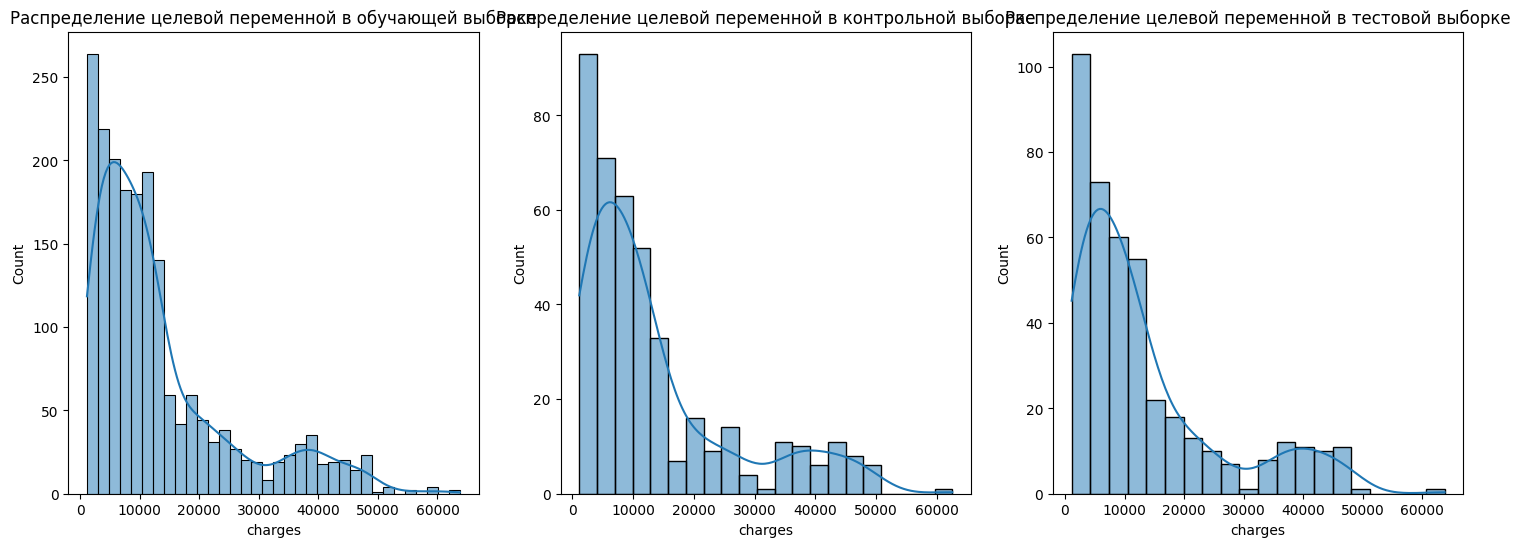

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv("..//static//csv//Medical_insurance.csv")

# Перемешивание данных
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Разделение на признаки и целевую переменную
X = df.drop('charges', axis=1)
y = df['charges']

# Разбиение на обучающую, контрольную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Функция для оценки сбалансированности выборок
def evaluate_balance(y_train, y_val, y_test):
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 3, 1)
    sns.histplot(y_train, kde=True)
    plt.title('Распределение целевой переменной в обучающей выборке')
    
    plt.subplot(1, 3, 2)
    sns.histplot(y_val, kde=True)
    plt.title('Распределение целевой переменной в контрольной выборке')
    
    plt.subplot(1, 3, 3)
    sns.histplot(y_test, kde=True)
    plt.title('Распределение целевой переменной в тестовой выборке')
    
    plt.show()

# Оценка сбалансированности выборок
evaluate_balance(y_train, y_val, y_test)

**Процесс конструирования признаков для обеих задач:**
1. **Анализ и очистка данных:**
   - Проверить наличие пропущенных значений и дубликатов и обработать их (заполнение средним значением, медианой или удаление строк).

2. **Кодирование категориальных признаков:**
   - Применить One-Hot Encoding для категориальных признаков (`sex`, `smoker`, `region`).

3. **Создание новых признаков:**
   - **Возрастные группы:** Разделить возраст на группы (например, молодые, средний возраст, пожилые).
   - **Индекс массы тела (ИМТ) группы:** Разделить ИМТ на группы (например, недостаточный вес, нормальный вес, избыточный вес, ожирение).
   - **Количество детей:** Создать бинарный признак, указывающий, есть ли у клиента дети.
   - **Комбинированные признаки:** Создать новые признаки, комбинируя существующие (например, возраст и ИМТ, возраст и статус курения).

4. **Нормализация и стандартизация:**
   - Применить нормализацию или стандартизацию к числовым признакам (`age`, `bmi`, `children`), чтобы привести их к одному масштабу.

5. **Анализ важности признаков:**
   - Удалить малозначимые признаки, чтобы упростить модель и улучшить ее производительность.

## 1. Оптимизация тарифов

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Загрузка данных
df = pd.read_csv("..//static//csv//Medical_insurance.csv")

# Перемешивание данных
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Разделение на признаки и целевую переменную
X = df.drop('charges', axis=1)
y = df['charges']

# Разбиение на обучающую, контрольную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Определение категориальных и числовых признаков
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

# Унитарное кодирование категориальных признаков (one-hot encoding)
train_data_encoded = pd.get_dummies(X_train, columns=categorical_features)
val_data_encoded = pd.get_dummies(X_val, columns=categorical_features)
test_data_encoded = pd.get_dummies(X_test, columns=categorical_features)

# Дискретизация числовых признаков (пример для возраста)
age_bins = [18, 30, 40, 50, 60, 100]
train_data_encoded['age_bin'] = pd.cut(train_data_encoded['age'], bins=age_bins, labels=False)
val_data_encoded['age_bin'] = pd.cut(val_data_encoded['age'], bins=age_bins, labels=False)
test_data_encoded['age_bin'] = pd.cut(test_data_encoded['age'], bins=age_bins, labels=False)

# «Ручной» синтез признаков (пример: комбинированный признак возраст и ИМТ)
train_data_encoded['age_bmi'] = train_data_encoded['age'] * train_data_encoded['bmi']
val_data_encoded['age_bmi'] = val_data_encoded['age'] * val_data_encoded['bmi']
test_data_encoded['age_bmi'] = test_data_encoded['age'] * test_data_encoded['bmi']

# Масштабирование числовых признаков
numerical_features = ['age', 'bmi', 'children', 'age_bmi']
scaler = StandardScaler()
train_data_encoded[numerical_features] = scaler.fit_transform(train_data_encoded[numerical_features])
val_data_encoded[numerical_features] = scaler.transform(val_data_encoded[numerical_features])
test_data_encoded[numerical_features] = scaler.transform(test_data_encoded[numerical_features])

# Вывод результатов
print("Обучающая выборка после конструирования признаков:")
print(train_data_encoded.head())

Обучающая выборка после конструирования признаков:
           age       bmi  children  sex_female  sex_male  smoker_no  \
1684  1.781292  0.374453 -0.907604        True     False       True   
862  -0.083478 -0.570585 -0.085975        True     False       True   
1992 -1.087585 -0.495147 -0.907604        True     False       True   
889   0.705463 -0.586335 -0.907604        True     False       True   
1362  0.777185 -0.680839 -0.907604       False      True       True   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
1684       False             False              True             False   
862        False              True             False             False   
1992       False             False             False              True   
889        False             False             False              True   
1362       False             False             False             False   

      region_southwest  age_bin   age_bmi  
1684             False      4.0  

## 2. Оценка рисков

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Загрузка данных
df = pd.read_csv("..//static//csv//Medical_insurance.csv")

# Перемешивание данных
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Разделение на признаки и целевую переменную
X = df.drop('charges', axis=1)
y = df['charges']

# Разбиение на обучающую, контрольную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Определение категориальных и числовых признаков
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

# Унитарное кодирование категориальных признаков (one-hot encoding)
train_data_encoded = pd.get_dummies(X_train, columns=categorical_features)
val_data_encoded = pd.get_dummies(X_val, columns=categorical_features)
test_data_encoded = pd.get_dummies(X_test, columns=categorical_features)

# Дискретизация числовых признаков (пример для возраста)
age_bins = [18, 30, 40, 50, 60, 100]
train_data_encoded['age_bin'] = pd.cut(train_data_encoded['age'], bins=age_bins, labels=False)
val_data_encoded['age_bin'] = pd.cut(val_data_encoded['age'], bins=age_bins, labels=False)
test_data_encoded['age_bin'] = pd.cut(test_data_encoded['age'], bins=age_bins, labels=False)

# «Ручной» синтез признаков (пример: комбинированный признак возраст и ИМТ)
train_data_encoded['age_bmi'] = train_data_encoded['age'] * train_data_encoded['bmi']
val_data_encoded['age_bmi'] = val_data_encoded['age'] * val_data_encoded['bmi']
test_data_encoded['age_bmi'] = test_data_encoded['age'] * test_data_encoded['bmi']

# Масштабирование числовых признаков
numerical_features = ['age', 'bmi', 'children', 'age_bmi']
scaler = StandardScaler()
train_data_encoded[numerical_features] = scaler.fit_transform(train_data_encoded[numerical_features])
val_data_encoded[numerical_features] = scaler.transform(val_data_encoded[numerical_features])
test_data_encoded[numerical_features] = scaler.transform(test_data_encoded[numerical_features])

# Вывод результатов
print("Обучающая выборка после конструирования признаков:")
print(train_data_encoded.head())

Обучающая выборка после конструирования признаков:
           age       bmi  children  sex_female  sex_male  smoker_no  \
1684  1.781292  0.374453 -0.907604        True     False       True   
862  -0.083478 -0.570585 -0.085975        True     False       True   
1992 -1.087585 -0.495147 -0.907604        True     False       True   
889   0.705463 -0.586335 -0.907604        True     False       True   
1362  0.777185 -0.680839 -0.907604       False      True       True   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
1684       False             False              True             False   
862        False              True             False             False   
1992       False             False             False              True   
889        False             False             False              True   
1362       False             False             False             False   

      region_southwest  age_bin   age_bmi  
1684             False      4.0  

## Процесс конструирования признаков с применением фреймворка Featuretools:

### 1. Оптимизация тарифов

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
import featuretools as ft

# Загрузка данных
df = pd.read_csv("..//static//csv//Medical_insurance.csv")

# Перемешивание данных
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Разделение на признаки и целевую переменную
X = df.drop('charges', axis=1)
y = df['charges']

# Разбиение на обучающую, контрольную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Определение категориальных и числовых признаков
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

# Унитарное кодирование категориальных признаков (one-hot encoding)
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features)
X_val_encoded = pd.get_dummies(X_val, columns=categorical_features)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features)

# Дискретизация числовых признаков (пример для возраста)
age_bins = [18, 30, 40, 50, 60, 100]
X_train_encoded['age_bin'] = pd.cut(X_train_encoded['age'], bins=age_bins, labels=False)
X_val_encoded['age_bin'] = pd.cut(X_val_encoded['age'], bins=age_bins, labels=False)
X_test_encoded['age_bin'] = pd.cut(X_test_encoded['age'], bins=age_bins, labels=False)

# «Ручной» синтез признаков (пример: комбинированный признак возраст и ИМТ)
X_train_encoded['age_bmi'] = X_train_encoded['age'] * X_train_encoded['bmi']
X_val_encoded['age_bmi'] = X_val_encoded['age'] * X_val_encoded['bmi']
X_test_encoded['age_bmi'] = X_test_encoded['age'] * X_test_encoded['bmi']

# Масштабирование числовых признаков
from sklearn.preprocessing import StandardScaler

numerical_features = ['age', 'bmi', 'children', 'age_bmi']
scaler = StandardScaler()
X_train_encoded[numerical_features] = scaler.fit_transform(X_train_encoded[numerical_features])
X_val_encoded[numerical_features] = scaler.transform(X_val_encoded[numerical_features])
X_test_encoded[numerical_features] = scaler.transform(X_test_encoded[numerical_features])

# Конструирование признаков с применением фреймворка Featuretools
es = ft.EntitySet(id='insurance_data')
es = es.add_dataframe(dataframe_name='train', dataframe=X_train_encoded, index='index')

# Генерация признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='train', max_depth=2)

# Преобразование признаков для контрольной и тестовой выборок
X_val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=X_val_encoded.index)
X_test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=X_test_encoded.index)

# Вывод результатов
print("Обучающая выборка после конструирования признаков:")
print(feature_matrix.head())

Обучающая выборка после конструирования признаков:
            age       bmi  children  sex_female  sex_male  smoker_no  \
index                                                                  
0      1.781292  0.374453 -0.907604        True     False       True   
1     -0.083478 -0.570585 -0.085975        True     False       True   
2     -1.087585 -0.495147 -0.907604        True     False       True   
3      0.705463 -0.586335 -0.907604        True     False       True   
4      0.777185 -0.680839 -0.907604       False      True       True   

       smoker_yes  region_northeast  region_northwest  region_southeast  \
index                                                                     
0           False             False              True             False   
1           False              True             False             False   
2           False             False             False              True   
3           False             False             False              Tr

c:\Users\midni\AIM\AIM-PIbd-32-Bulatova-K-R\aimenv\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index index not found in dataframe, creating new integer column
  warnings.warn(
c:\Users\midni\AIM\AIM-PIbd-32-Bulatova-K-R\aimenv\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
c:\Users\midni\AIM\AIM-PIbd-32-Bulatova-K-R\aimenv\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:143: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, default_df], sort=True)
c:\Users\midni\AIM\AIM-PIbd-32-Bulatova-K-R\aimenv\Lib\site-packages\

### 2. Оценка рисков

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
import featuretools as ft

# Загрузка данных
df = pd.read_csv("..//static//csv//Medical_insurance.csv")

# Перемешивание данных
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Разделение на признаки и целевую переменную
X = df.drop('charges', axis=1)
y = df['charges']

# Разбиение на обучающую, контрольную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Определение категориальных и числовых признаков
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

# Унитарное кодирование категориальных признаков (one-hot encoding)
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features)
X_val_encoded = pd.get_dummies(X_val, columns=categorical_features)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features)

# Дискретизация числовых признаков (пример для возраста)
age_bins = [18, 30, 40, 50, 60, 100]
X_train_encoded['age_bin'] = pd.cut(X_train_encoded['age'], bins=age_bins, labels=False)
X_val_encoded['age_bin'] = pd.cut(X_val_encoded['age'], bins=age_bins, labels=False)
X_test_encoded['age_bin'] = pd.cut(X_test_encoded['age'], bins=age_bins, labels=False)

# «Ручной» синтез признаков (пример: комбинированный признак возраст и ИМТ)
X_train_encoded['age_bmi'] = X_train_encoded['age'] * X_train_encoded['bmi']
X_val_encoded['age_bmi'] = X_val_encoded['age'] * X_val_encoded['bmi']
X_test_encoded['age_bmi'] = X_test_encoded['age'] * X_test_encoded['bmi']

# Масштабирование числовых признаков
from sklearn.preprocessing import StandardScaler

numerical_features = ['age', 'bmi', 'children', 'age_bmi']
scaler = StandardScaler()
X_train_encoded[numerical_features] = scaler.fit_transform(X_train_encoded[numerical_features])
X_val_encoded[numerical_features] = scaler.transform(X_val_encoded[numerical_features])
X_test_encoded[numerical_features] = scaler.transform(X_test_encoded[numerical_features])

# Конструирование признаков с применением фреймворка Featuretools
es = ft.EntitySet(id='insurance_data')
es = es.add_dataframe(dataframe_name='train', dataframe=X_train_encoded, index='index')

# Генерация признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='train', max_depth=2)

# Преобразование признаков для контрольной и тестовой выборок
X_val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=X_val_encoded.index)
X_test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=X_test_encoded.index)

# Вывод результатов
print("Обучающая выборка после конструирования признаков:")
print(feature_matrix.head())

Обучающая выборка после конструирования признаков:
            age       bmi  children  sex_female  sex_male  smoker_no  \
index                                                                  
0      1.781292  0.374453 -0.907604        True     False       True   
1     -0.083478 -0.570585 -0.085975        True     False       True   
2     -1.087585 -0.495147 -0.907604        True     False       True   
3      0.705463 -0.586335 -0.907604        True     False       True   
4      0.777185 -0.680839 -0.907604       False      True       True   

       smoker_yes  region_northeast  region_northwest  region_southeast  \
index                                                                     
0           False             False              True             False   
1           False              True             False             False   
2           False             False             False              True   
3           False             False             False              Tr

c:\Users\midni\AIM\AIM-PIbd-32-Bulatova-K-R\aimenv\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index index not found in dataframe, creating new integer column
  warnings.warn(
c:\Users\midni\AIM\AIM-PIbd-32-Bulatova-K-R\aimenv\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
c:\Users\midni\AIM\AIM-PIbd-32-Bulatova-K-R\aimenv\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:143: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, default_df], sort=True)
c:\Users\midni\AIM\AIM-PIbd-32-Bulatova-K-R\aimenv\Lib\site-packages\

## Оценка качества наборов признаков по критериям:

### 1. Предсказательная способность

**Определение:** 
Предсказательная способность набора признаков определяет, насколько хорошо эти признаки позволяют модели предсказывать целевую переменную.

**Оценка:**
- **Обучающая выборка:** 
  - Оценивается с помощью метрик качества модели (например, RMSE, MAE, R²) на обучающей выборке.
  - Высокие значения метрик указывают на высокую предсказательную способность.
- **Контрольная и тестовая выборки:**
  - Оценивается с помощью метрик качества модели на контрольной и тестовой выборках.
  - Близкие значения метрик на всех выборках указывают на хорошую обобщающую способность модели.

### 2. Скорость вычисления

**Определение:**
Скорость вычисления набора признаков определяет, насколько быстро можно вычислить эти признаки и обучить модель на них.

**Оценка:**
- **Время вычисления признаков:**
  - Измеряется время, затрачиваемое на вычисление признаков для всех выборок.
  - Меньшее время указывает на более быстрое вычисление.
- **Время обучения модели:**
  - Измеряется время, затрачиваемое на обучение модели на вычисленных признаках.
  - Меньшее время указывает на более быстрое обучение.

### 3. Надежность

**Определение:**
Надежность набора признаков определяет, насколько стабильно модель, обученная на этих признаках, показывает хорошие результаты на разных выборках данных.

**Оценка:**
- **Стабильность метрик:**
  - Оценивается стабильность метрик качества модели (например, RMSE, MAE, R²) на разных выборках данных.
  - Близкие значения метрик на разных выборках указывают на высокую надежность.
- **Устойчивость к изменениям данных:**
  - Оценивается, как меняются метрики качества модели при добавлении или удалении данных.
  - Небольшие изменения метрик указывают на высокую устойчивость.

### 4. Корреляция

**Определение:**
Корреляция набора признаков определяет, насколько сильно признаки коррелируют друг с другом и с целевой переменной.

**Оценка:**
- **Корреляция между признаками:**
  - Оценивается с помощью матрицы корреляции признаков.
  - Высокая корреляция между признаками может привести к мультиколлинеарности, что снижает качество модели.
- **Корреляция с целевой переменной:**
  - Оценивается с помощью коэффициента корреляции Пирсона или Спирмена.
  - Высокая корреляция с целевой переменной указывает на высокую предсказательную способность признаков.

### 5. Цельность

**Определение:**
Цельность набора признаков определяет, насколько хорошо признаки соответствуют бизнес-целям и задачам модели.

**Оценка:**
- **Соответствие бизнес-целям:**
  - Оценивается, насколько признаки помогают решать поставленные бизнес-задачи (например, оптимизация тарифов, оценка рисков).
  - Признаки, которые помогают решать бизнес-задачи, считаются целесообразными.
- **Интерпретируемость:**
  - Оценивается, насколько легко интерпретировать значения признаков и их влияние на целевую переменную.
  - Интерпретируемые признаки считаются более целесообразными.

c:\Users\midni\AIM\AIM-PIbd-32-Bulatova-K-R\aimenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 2750.642231395856
R²: 0.9507037692209687
MAE: 1279.1669853384874
Cross-validated RMSE: 3242.964333689781


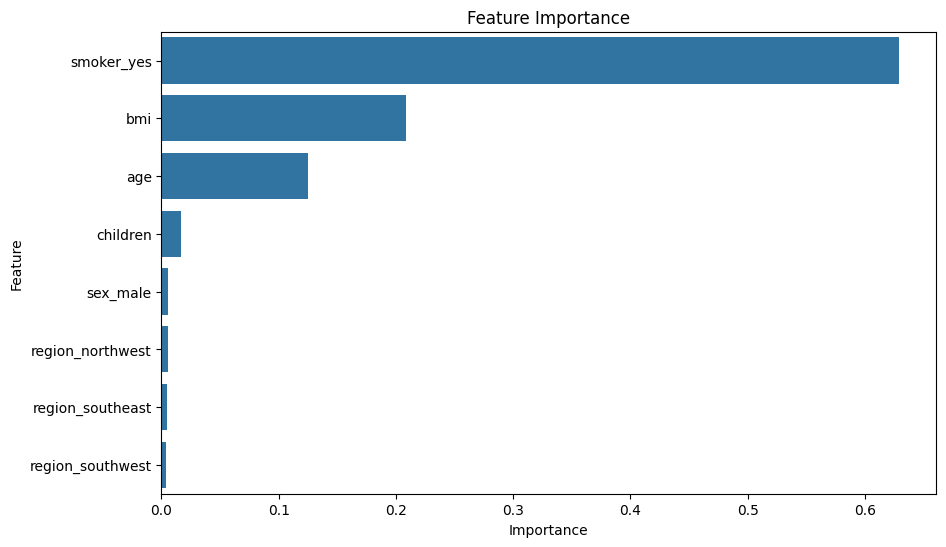

Train RMSE: 1072.3827255198853
Train R²: 0.9921277274068127
Train MAE: 480.25126389741285


c:\Users\midni\AIM\AIM-PIbd-32-Bulatova-K-R\aimenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


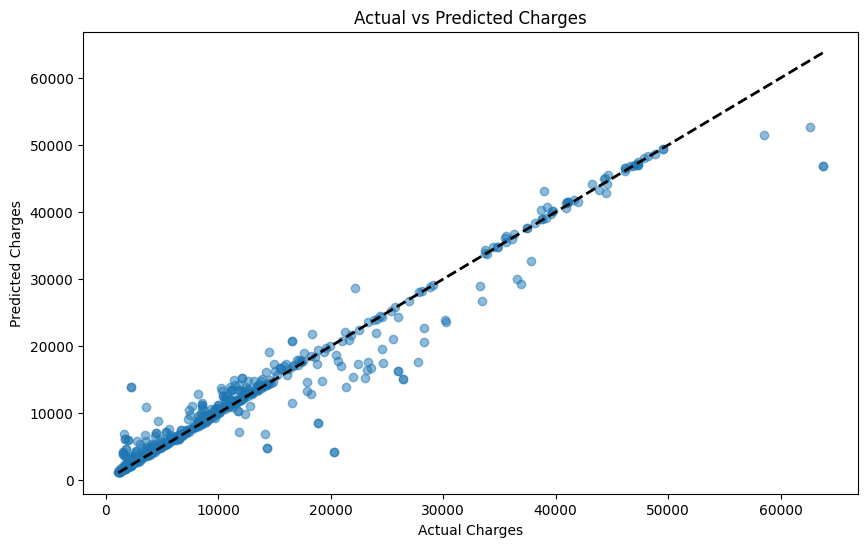

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv("..//static//csv//Medical_insurance.csv")

# Предобработка данных
# Преобразуем категориальные переменные в числовые
df = pd.get_dummies(df, drop_first=True)

# Разделение данных на признаки и целевую переменную
X = df.drop('charges', axis=1)
y = df['charges']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выбор модели
model = RandomForestRegressor(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание и оценка
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"MAE: {mae}")

# Кросс-валидация
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv = (-scores.mean())**0.5
print(f"Cross-validated RMSE: {rmse_cv}")

# Анализ важности признаков
feature_importances = model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

# Проверка на переобучение
y_train_pred = model.predict(X_train)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"Train RMSE: {rmse_train}")
print(f"Train R²: {r2_train}")
print(f"Train MAE: {mae_train}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

## Вывод по данным:

1. Train RMSE: Значение RMSE на обучающей выборке составляет 1072.38, что указывает на среднеквадратичную ошибку в предсказании стоимости медицинского страхования.

2. Train R²: Значение R² на обучающей выборке составляет 0.9921, что говорит о том, что модель объясняет 99.21% вариации в данных. Это очень высокий показатель, что может указывать на потенциальное переобучение.

3. Train MAE: Значение MAE на обучающей выборке составляет 480.25, что указывает на среднюю абсолютную ошибку в предсказании стоимости медицинского страхования.